#                                  Credit Risk Prediction

Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

Content
The selected attributes are:

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
Get the Data

Use pandas to read german_credit_data.csv as a dataframe called train.


In [3]:
train = pd.read_csv('german_credit_data.csv')

In [ ]:
Check out the info(), head(), and describe() methods on loans.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [5]:
train.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
train.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


# Exploratory Data Analysis

Let's do some data visualization!


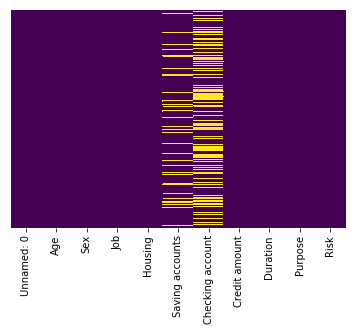

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

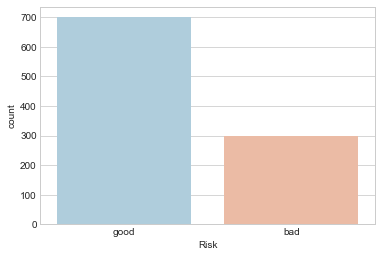

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',data=train,palette='RdBu_r')

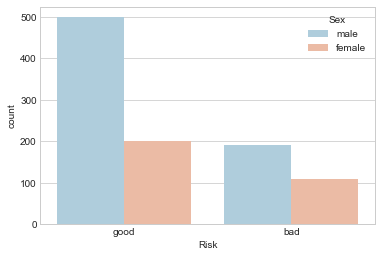

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Sex',data=train,palette='RdBu_r')

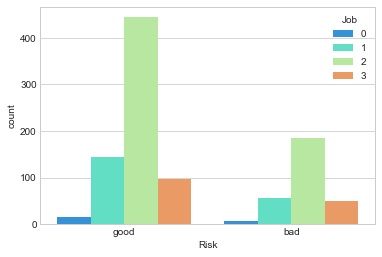

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Job',data=train,palette='rainbow')

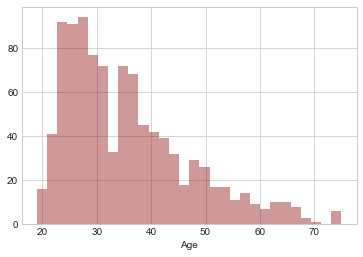

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [10]:
train.dropna(inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 11 columns):
Unnamed: 0          522 non-null int64
Age                 522 non-null int64
Sex                 522 non-null object
Job                 522 non-null int64
Housing             522 non-null object
Saving accounts     522 non-null object
Checking account    522 non-null object
Credit amount       522 non-null int64
Duration            522 non-null int64
Purpose             522 non-null object
Risk                522 non-null object
dtypes: int64(5), object(6)
memory usage: 48.9+ KB


# Categorical Features

We need to transform the categorical columns using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.


In [12]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
housing = pd.get_dummies(train['Housing'],drop_first=True)
purpose = pd.get_dummies(train['Purpose'],drop_first=True)

In [13]:
train.drop(['Sex','Housing','Purpose'],axis=1,inplace=True)

In [14]:
train = pd.concat([train,sex,housing,purpose],axis=1)

In [15]:
train.drop('Saving accounts',axis=1,inplace=True)

In [16]:
train.drop('Checking account',axis=1,inplace=True)

In [17]:
train.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Risk,male,own,rent,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
1,1,22,2,5951,48,bad,0,1,0,0,0,0,0,1,0,0
3,3,45,2,7882,42,good,1,0,0,0,0,0,1,0,0,0
4,4,53,2,4870,24,bad,1,0,0,1,0,0,0,0,0,0
7,7,35,3,6948,36,good,1,0,1,1,0,0,0,0,0,0
9,9,28,3,5234,30,bad,1,1,0,1,0,0,0,0,0,0


# Train Test Split

Now its time to split our data into a training set and a testing set!

Use sklearn to split your data into a training set and a testing set as we've done in the past.


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X= train [['Age','Job','Credit amount','Duration','education','own','rent','car','repairs']]
y= train ['Risk']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=101)

# Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**


In [31]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Predictions and Evaluation of Decision Tree**

Create predictions from the test set and create a classification report and a confusion matrix.


In [33]:
predictions = dtree.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

        bad       0.46      0.46      0.46        69
       good       0.57      0.57      0.57        88

avg / total       0.52      0.52      0.52       157

[[32 37]
 [38 50]]


# Training the Random Forest model

Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=600)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Predictions and Evaluation**

Let's predict off the y_test values and evaluate our model.

 Predict on the X_test data.


In [40]:
predictions = rfc.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
Show the classification report and Confusion Matrix for the predictions.

In [42]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

        bad       0.58      0.54      0.56        69
       good       0.66      0.69      0.67        88

avg / total       0.62      0.62      0.62       157

[[37 32]
 [27 61]]


**What performed better the random forest or the decision tree?**

In [ ]:
Random Forest performed slightly better.